Identifies the input image using model built using the Convolution Neural Networks.

In [2]:
from keras.datasets import cifar10
(x_train,y_train), (x_test,y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 32s 0us/step


Label   Name      
 [0]    Airplane
 [1]    Automobile
 [2]    Bird
 [3]    Cat
 [4]    Deer
 [5]    Dog
 [6]    Frog
 [7]    Horse
 [8]    Ship
 [9]    Truck

In [8]:
print(x_train.shape)

(50000, 32, 32, 3)


Data contains (rows, pixels, pixels, depth)

In [10]:
# Looking at the first image
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

Each row defines a pixel [Red, Green, Blue] of the image.

AxesImage(54,36;334.8x217.44)
Label: Frog


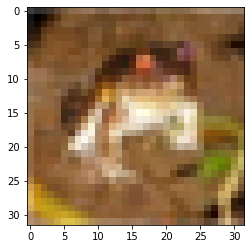

In [44]:
# Displaying the image
number_to_class = ['Airplane','Automobile','Bird','Cat','Deer','Dog', 'Frog','Horse','Ship','Truck']
import matplotlib.pyplot as plt
img = plt.imshow(x_train[0])
print(img)
print("Label:", number_to_class[y_train[0][0]])


In [15]:
# One-Hot Encoding: Convert the labels into a set of 10 numbers
# to input into the neural network
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
y_test_one_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [16]:
# Print new labels
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [17]:
# Normalize the pixels in the images to be values between 0 and 1
# We can do this by dividing each RGB value by 255 since 255 is the largest value it can have.
x_train = x_train / 255
x_test = x_test / 255


In [18]:
# Build the Convolutional Neural Network
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [20]:
#Creating the model
model = Sequential()

#Convolution Layer
model.add(Conv2D(32, (5,5), activation = 'relu', input_shape = (32,32,3)))
# Number of channels: 32
# No of rows and columns : 5,5
# input_shape needs to be added for the first layer (pixels,pixels,depth)
# relu = rectifier linear unit

# Maxpooling Layer
model.add(MaxPooling2D(pool_size = (2,2)))
# 2x2 filter. Example: 32x32 pixel image will be reduced to 16x16 pixel image

#Convolution 2nd Layer
model.add(Conv2D(32, (5,5), activation = 'relu'))
# Number of channels: 32
# No of rows and columns : 5,5
# input_shape needs to be added for the first layer (pixels,pixels,depth)

# Maxpooling Layer
model.add(MaxPooling2D(pool_size = (2,2)))
# 2x2 filter. Example: 32x32 pixel image will be reduced to 16x16 pixel image

# Flatten Layer
model.add(Flatten())
model.add(Dense(1000, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [22]:
# Compile the model
# For class more than 2, categorical_crossentropy
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [23]:
hist = model.fit(x_train, y_train_one_hot, batch_size = 256, epochs = 10, validation_split = 0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 53s 2ms/step - loss: 1.7610 - accuracy: 0.3646 - val_loss: 1.4864 - val_accuracy: 0.4653
Epoch 2/10
35000/35000 [==============================] - 49s 1ms/step - loss: 1.3960 - accuracy: 0.4985 - val_loss: 1.4464 - val_accuracy: 0.4837
Epoch 3/10
35000/35000 [==============================] - 47s 1ms/step - loss: 1.2591 - accuracy: 0.5528 - val_loss: 1.2166 - val_accuracy: 0.5656
Epoch 4/10
35000/35000 [==============================] - 51s 1ms/step - loss: 1.1577 - accuracy: 0.5895 - val_loss: 1.1835 - val_accuracy: 0.5857
Epoch 5/10
35000/35000 [==============================] - 52s 1ms/step - loss: 1.0789 - accuracy: 0.6203 - val_loss: 1.1695 - val_accuracy: 0.5853
Epoch 6/10
35000/35000 [==============================] - 46s 1ms/step - loss: 1.0057 - accuracy: 0.6485 - val_loss: 1.0726 - val_accuracy: 0.6265
Epoch 7/10
35000/35000 [==============================] - 45s 1ms/st

In [24]:
# Models accuracy
model.evaluate(x_test, y_test_one_hot)[1]

10000/10000 [==============================] - 5s 476us/step


0.6430000066757202

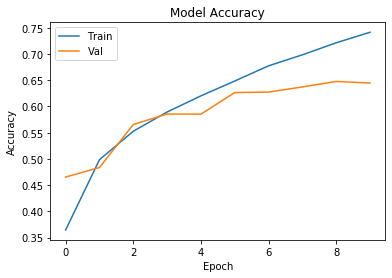

In [26]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc = 'upper left')
plt.show()

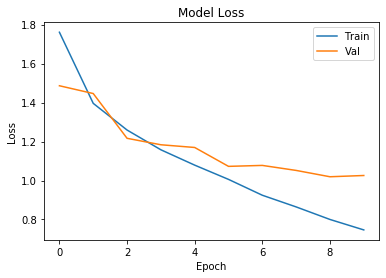

In [28]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc = 'upper right')
plt.show()

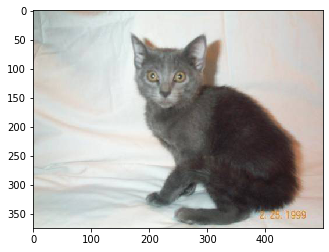

In [31]:
import matplotlib.image as mpimg
img = mpimg.imread('cat.jpg')
plt.imshow(img)

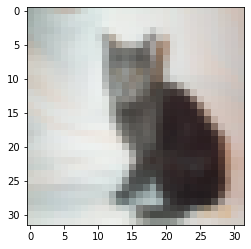

In [32]:
# Resize the image
from skimage.transform import resize
img = resize(img, (32,32,3))
plt.imshow(img)

In [34]:
# Get the probabilities for each class
import numpy as np
probabilities = model.predict(np.array([img]))
probabilities

array([[2.9395393e-03, 9.5107589e-06, 6.0468920e-02, 7.2536343e-01,
        8.0432771e-03, 1.5528344e-01, 6.5801032e-03, 3.9431110e-02,
        1.7576123e-03, 1.2304346e-04]], dtype=float32)

In [38]:
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[-1]], '--Prob:', probabilities[0,index[-1]])

Most likely class: Cat --Prob: 0.72536343


In [43]:
print("2nd likely class:", number_to_class[index[-2]], '--Prob:', probabilities[0,index[-2]])
print("3rd likely class:", number_to_class[index[-3]], '--Prob:', probabilities[0,index[-3]])
print("4th likely class:", number_to_class[index[-4]], '--Prob:', probabilities[0,index[-4]])
print("5th likely class:", number_to_class[index[-5]], '--Prob:', probabilities[0,index[-5]])

2nd likely class: Dog --Prob: 0.15528344
3rd likely class: Bird --Prob: 0.06046892
4th likely class: Horse --Prob: 0.03943111
5th likely class: Deer --Prob: 0.008043277
